In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()



import tensorflow as tf
import h5py


### 步骤: 

#### 1 文档来源 https://cloud.tencent.com/developer/article/1613243
#### 2 ccrypto api用不了, 所以就用了以前的那个网站的数据，下载了btc，ltc，xtz，eth的数据（从2020年12月到2021年11月，1h的resolution）  https://data.binance.vision/?prefix=data/spot/monthly/klines/ 
#### 3 将所有数据分开合并成一年长度，并且进行数据的preprocessing。文档中只使用了收盘价，因此，我们将四个虚拟货币的收盘价进行合并
#### 4 根据文档，我们应该首先可视化数据, 使用minmaxscaler， 我们选择使用ltc和eth（因为和btc相关性高）
#### 5 待续。。。。

### 一些担忧
时间column，是否需要改成“年-月-日”类型？

In [ ]:


from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#ethusd

import pandas as pd
import numpy as np
ethusd202012 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ethusd/ETHUSDT-1h-2020-12.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202101 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ethusd/ETHUSDT-1h-2021-01.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202102 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ethusd/ETHUSDT-1h-2021-02.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202103 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ethusd/ETHUSDT-1h-2021-03.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202104 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ethusd/ETHUSDT-1h-2021-04.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202105 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ethusd/ETHUSDT-1h-2021-05.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202106 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ethusd/ETHUSDT-1h-2021-06.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202107 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ethusd/ETHUSDT-1h-2021-07.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202108 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ethusd/ETHUSDT-1h-2021-08.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202109 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ethusd/ETHUSDT-1h-2021-09.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202110 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ethusd/ETHUSDT-1h-2021-10.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd202111 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ethusd/ETHUSDT-1h-2021-11.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ethusd = pd.DataFrame()
frame = [ethusd202012, ethusd202102, ethusd202103, ethusd202104, ethusd202105, ethusd202106, ethusd202107, ethusd202108, ethusd202109, ethusd202110]
for df in frame:
  ethusd = ethusd.append(df, ignore_index= True)

print(ethusd.shape)
#print(ethusd202012.shape)







(7279, 12)


In [ ]:
#xtzusd

xtzusd202012 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/xtzusd/XTZUSDT-1h-2020-12.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202101 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/xtzusd/XTZUSDT-1h-2021-01.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202102 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/xtzusd/XTZUSDT-1h-2021-02.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202103 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/xtzusd/XTZUSDT-1h-2021-03.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202104 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/xtzusd/XTZUSDT-1h-2021-04.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202105 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/xtzusd/XTZUSDT-1h-2021-05.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202106 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/xtzusd/XTZUSDT-1h-2021-06.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202107 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/xtzusd/XTZUSDT-1h-2021-07.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202108 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/xtzusd/XTZUSDT-1h-2021-08.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202109 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/xtzusd/XTZUSDT-1h-2021-09.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202110 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/xtzusd/XTZUSDT-1h-2021-10.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd202111 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/xtzusd/XTZUSDT-1h-2021-11.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
xtzusd = pd.DataFrame()
frame = [xtzusd202012, xtzusd202102, xtzusd202103, xtzusd202104, xtzusd202105, xtzusd202106, xtzusd202107, xtzusd202108, xtzusd202109, xtzusd202110]
for df in frame:
  xtzusd = xtzusd.append(df, ignore_index= True)

print(xtzusd.shape)

(7279, 12)


In [ ]:
ltcusd202012 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ltcusd/LTCUSDT-1h-2020-12.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202101 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ltcusd/LTCUSDT-1h-2021-01.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202102 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ltcusd/LTCUSDT-1h-2021-02.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202103 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ltcusd/LTCUSDT-1h-2021-03.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202104 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ltcusd/LTCUSDT-1h-2021-04.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202105 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ltcusd/LTCUSDT-1h-2021-05.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202106 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ltcusd/LTCUSDT-1h-2021-06.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202107 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ltcusd/LTCUSDT-1h-2021-07.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202108 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ltcusd/LTCUSDT-1h-2021-08.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202109 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ltcusd/LTCUSDT-1h-2021-09.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202110 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ltcusd/LTCUSDT-1h-2021-10.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd202111 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/ltcusd/LTCUSDT-1h-2021-11.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
ltcusd = pd.DataFrame()
frame = [ltcusd202012, ltcusd202102, ltcusd202103, ltcusd202104, ltcusd202105, ltcusd202106, ltcusd202107, ltcusd202108, ltcusd202109, ltcusd202110]
for df in frame:
  ltcusd = ltcusd.append(df, ignore_index= True)

print(ltcusd.shape)

(7279, 12)


In [ ]:
btcusd202012 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/btcusd/BTCUSDT-1h-2020-12.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202101 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/btcusd/BTCUSDT-1h-2021-01.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202102 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/btcusd/BTCUSDT-1h-2021-02.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202103 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/btcusd/BTCUSDT-1h-2021-03.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202104 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/btcusd/BTCUSDT-1h-2021-04.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202105 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/btcusd/BTCUSDT-1h-2021-05.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202106 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/btcusd/BTCUSDT-1h-2021-06.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202107 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/btcusd/BTCUSDT-1h-2021-07.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202108 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/btcusd/BTCUSDT-1h-2021-08.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202109 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/btcusd/BTCUSDT-1h-2021-09.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202110 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/btcusd/BTCUSDT-1h-2021-10.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd202111 = pd.read_csv('/content/gdrive/My Drive/csci5622 project dataset/cryptodata/btcusd/BTCUSDT-1h-2021-11.csv', names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume' , 'Number of trades', 'Taker buy base asset volume',
                                                                                                            'Taker buy quote asset volume', 'Ignore' ])
btcusd = pd.DataFrame()
frame = [btcusd202012, btcusd202102, btcusd202103, btcusd202104, btcusd202105, btcusd202106, btcusd202107, btcusd202108, btcusd202109, btcusd202110]
for df in frame:
  btcusd = btcusd.append(df, ignore_index= True)

print(btcusd.shape)

(7279, 12)


In [ ]:
#preprocessing
#eth
ethusd_dropped = ethusd.drop(ethusd.columns[7:12], axis = 1)
#print(ethusd_dropped)
ethusd_close = ethusd_dropped["Close"]
#xtz
xtzusd_dropped = xtzusd.drop(xtzusd.columns[7:12], axis = 1)
#print(xtzusd_dropped)
xtzusd_close = xtzusd_dropped["Close"]

#ltc
ltcusd_dropped = ltcusd.drop(ltcusd.columns[7:12], axis = 1)

ltcusd_close = ltcusd_dropped["Close"]

#btc
btcusd_dropped = btcusd.drop(btcusd.columns[7:12], axis = 1)

btcusd_close = btcusd_dropped["Close"]

close_prices = pd.concat([btcusd_dropped["Close time"], ethusd_close, xtzusd_close, ltcusd_close, btcusd_close], axis = 1)
close_prices.columns.values[1] = "ETHUSD"
close_prices.columns.values[2] = "XTZUSD"
close_prices.columns.values[3] = "LTCUSD"
close_prices.columns.values[4] = "BTCUSD"
#close_prices = close_prices.rename(columns = {"Close time":"close time", "Close" : "ETHUSD", "Close": "XTZUSD", "Close": "LTCUSD", "Close": "BTCUSD"})
print(close_prices)
#concat

         Close time   ETHUSD  XTZUSD  LTCUSD    BTCUSD
0     1606784399999   605.63  2.4686   86.37  19565.47
1     1606787999999   610.93  2.4837   89.78  19605.75
2     1606791599999   611.07  2.4815   90.14  19680.95
3     1606795199999   605.14  2.4581   88.25  19419.74
4     1606798799999   603.59  2.4346   89.01  19354.31
...             ...      ...     ...     ...       ...
7274  1635710399999  4247.82  6.2340  191.10  60689.95
7275  1635713999999  4265.11  6.2850  191.40  60922.36
7276  1635717599999  4306.45  6.3350  192.20  61444.33
7277  1635721199999  4293.00  6.3310  191.90  61365.72
7278  1635724799999  4287.21  6.3520  191.90  61299.80

[7279 rows x 5 columns]


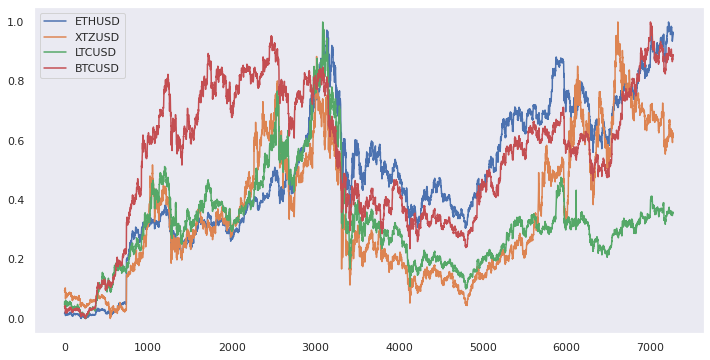

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
close_prices = close_prices.drop(close_prices.columns[0], axis = 1)
sdf_np = scaler.fit_transform(close_prices)
sdf = pd.DataFrame(sdf_np, columns=close_prices.columns, index=close_prices.index)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(sdf)
plt.legend(sdf.columns)



In [ ]:
close_prices.columns

Index(['ETHUSD', 'XTZUSD', 'LTCUSD', 'BTCUSD'], dtype='object')

Text(0, 0.5, 'Average Correlation')

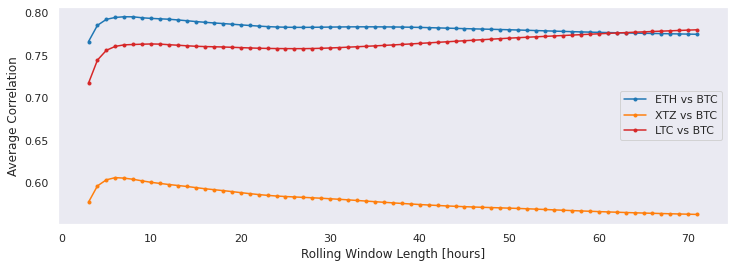

In [ ]:
blue, orange, red = '#1f77b4', '#ff7f0e', '#d62728'  
plt.figure(figsize=(12,4))
plt.grid()
avg_corr1, avg_corr2, avg_corr3 = list(), list(), list()
for win in range(3, 72): # hours
    avg_corr1.append(close_prices.ETHUSD.rolling(win).corr(close_prices.BTCUSD) \
                     .replace([np.inf, -np.inf], np.nan).dropna().mean())
    avg_corr2.append(close_prices.XTZUSD.rolling(win).corr(close_prices.BTCUSD) \
                     .replace([np.inf, -np.inf], np.nan).dropna().mean())
    avg_corr3.append(close_prices.LTCUSD.rolling(win).corr(close_prices.BTCUSD) \
                     .replace([np.inf, -np.inf], np.nan).dropna().mean())

    
plt.plot(range(3, 72), avg_corr1, '.-', color=blue, label='ETH vs BTC')
plt.plot(range(3, 72), avg_corr2, '.-', color=orange, label='XTZ vs BTC')
plt.plot(range(3, 72), avg_corr3, '.-', color=red, label='LTC vs BTC')
 
plt.legend()
plt.xlabel('Rolling Window Length [hours]', fontsize=12)
plt.ylabel('Average Correlation', fontsize=12)

In [ ]:
#features

def displayS(dfs:list, captions:list, space=5):

    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'") \
                  .set_caption(caption)._repr_html_()
        output += space * "\xa0\xa0\xa0"
    display(HTML(output))

In [ ]:

# 使用滞后的时间序列btcusd的价格作为标签，首先将11月的数据加入进来然后进行预处理


btclabel = pd.concat([btcusd["Close time"], btcusd["Close"]], axis = 1)
btclabel.columns.values[1] = "BTCUSD-2"
#btclabel.columns.values[1] = "BTCUSD-2"
#print(label)
lag_btclabel_2 = btclabel.iloc[-(btclabel.shape[0] - 2):]
lag_btclabel_1 = btclabel.iloc[-(btclabel.shape[0] - 1):]

#print(lag_label)

#加上11月的前两小时的数据
#加上11月的前一小时的数据
#label就是正常时间序列的数据
#features : btc -2, btc -1, eth -2, eth - 1, ltc - 2, ltc - 1. label btc


#对btc进行-1，-2处理
btcusd202111_dropped = btcusd202111.drop(btcusd202111.columns[7:12], axis = 1)
btcusd202111_label = pd.concat([btcusd202111_dropped["Close time"], btcusd202111_dropped["Close"]], axis = 1)
btcusd202111_label.columns.values[1] = "BTCUSD-2"
btcusdt_2 = lag_btclabel_2.append(btcusd202111_label.head(2))
btcusdt_2 = btcusdt_2.reset_index(drop = True)
# print("btcusd t - 2")
# print(btcusdt_2)


btcusdt_1 = lag_btclabel_1.append(btcusd202111_label.head(1))
btcusdt_1 = btcusdt_1.reset_index(drop = True)
btcusdt_1.columns.values[1] = "BTCUSD-1"
# print("btcusd t - 1")
# print(btcusdt_1)


#对ltc进行-2，-1处理


ltclabel = pd.concat([ltcusd["Close time"], ltcusd["Close"]], axis = 1)
ltclabel.columns.values[1] = "LTCUSD-2"
lag_ltclabel_1 = ltclabel.iloc[-(ltclabel.shape[0] - 1):]
lag_ltclabel_2 = ltclabel.iloc[-(ltclabel.shape[0] - 2):]



ltcusd202111_dropped = ltcusd202111.drop(ltcusd202111.columns[7:12], axis = 1)
ltcusd202111_label = pd.concat([ltcusd202111_dropped["Close time"], ltcusd202111_dropped["Close"]], axis = 1)
ltcusd202111_label.columns.values[1] = "LTCUSD-2"
ltcusdt_2 = lag_ltclabel_2.append(ltcusd202111_label.head(2))
ltcusdt_2 = ltcusdt_2.reset_index(drop = True)
# print("ltcusdt - 2")
# print(ltcusdt_2)



ltcusdt_1 = lag_ltclabel_1.append(ltcusd202111_label.head(1))
ltcusdt_1 = ltcusdt_1.reset_index(drop = True)
ltcusdt_1.columns.values[1] = "LTCUSD-1"
# print("ltcusdt - 1")
# print(ltcusdt_1)


#xtz
xtzlabel = pd.concat([xtzusd["Close time"], xtzusd["Close"]], axis = 1)
xtzlabel.columns.values[1] = "XTZUSD-2"
lag_xtzlabel_1 = xtzlabel.iloc[-(xtzlabel.shape[0] - 1):]
lag_xtzlabel_2 = xtzlabel.iloc[-(xtzlabel.shape[0] - 2):]


xtzusd202111_dropped = xtzusd202111.drop(xtzusd202111.columns[7:12], axis = 1)
xtzusd202111_label = pd.concat([xtzusd202111_dropped["Close time"], xtzusd202111_dropped["Close"]], axis = 1)
xtzusd202111_label.columns.values[1] = "XTZUSD-2"
xtzusdt_2 = lag_xtzlabel_2.append(xtzusd202111_label.head(2))
xtzusdt_2 = xtzusdt_2.reset_index(drop = True)
# print("xtzusdt - 2")
# print(xtzusdt_2)



xtzusdt_1 = lag_xtzlabel_1.append(xtzusd202111_label.head(1))
xtzusdt_1 = xtzusdt_1.reset_index(drop = True)
xtzusdt_1.columns.values[1] = "XZTUSD-1"
# print("xtzusdt - 1")
# print(xtzusdt_1)

#eth

ethlabel = pd.concat([ethusd["Close time"], ethusd["Close"]], axis = 1)
ethlabel.columns.values[1] = "ETHUSD-2"
lag_ethlabel_1 = ethlabel.iloc[-(ethlabel.shape[0] - 1):]
lag_ethlabel_2 = ethlabel.iloc[-(ethlabel.shape[0] - 2):]


ethusd202111_dropped = ethusd202111.drop(ethusd202111.columns[7:12], axis = 1)
ethusd202111_label = pd.concat([ethusd202111_dropped["Close time"], ethusd202111_dropped["Close"]], axis = 1)
ethusd202111_label.columns.values[1] = "ETHUSD-2"
ethusdt_2 = lag_ethlabel_2.append(ethusd202111_label.head(2))
ethusdt_2 = ethusdt_2.reset_index(drop = True)
# print("ethusd-2")
# print(ethusdt_2.head())



ethusdt_1 = lag_ethlabel_1.append(ethusd202111_label.head(1))
ethusdt_1 = ethusdt_1.reset_index(drop = True)
ethusdt_1.columns.values[1] = "ETHUSD-1"
#print("ethusd t - 1")
#print(ethusdt_1.head())



#CONCAT ALL FEATURES

features = pd.concat([btcusdt_2, ethusdt_2, xtzusdt_2, ltcusdt_2,btcusdt_1, ethusdt_1, xtzusdt_1, ltcusdt_1], axis = 1)
features = features.drop("Close time", 1)
features.columns.values[0] = "BTCUSD-2"
features.columns.values[1] = "ETHUSD-2"
features.columns.values[2] = "XTZUSD-2"
features.columns.values[3] = "LTCUSD-2"
print(features.shape)
#print(features.head(10))
#print("null:")
#print(features.isnull().sum())
#print("0:")
#print((features==0).astype(int).any())
#label, 为"当前"的比特币价格
# t-2    t-1          t    
#---------------------------
# feature  feature    label    
#
#print(btcusd202111_label)
ori_label = btclabel.iloc[-(btclabel.shape[0] - 4):]
btcusd202111_label.columns.values[1] = "BTCUSD-1"
label = ori_label.append(btcusd202111_label.head(4))
#print(label)
label = label.drop("Close time", 1)


label = label.reset_index(drop = True)
label.columns.values[0] = "BTCUSD-0"
print(label)
#label = label.drop(label.columns[0], axis = 1)
#print(label.shape)
#print(label)


(7279, 8)
      BTCUSD-0
0     19354.31
1     19483.73
2     19338.34
3     19515.63
4     19466.99
...        ...
7274  61299.80
7275  61617.76
7276  61354.01
7277  60580.04
7278  59934.99

[7279 rows x 1 columns]


In [ ]:
data = pd.concat([features, label], axis = 1)
print(data)

      BTCUSD-2  ETHUSD-2  XTZUSD-2  ...  XZTUSD-1  LTCUSD-1  BTCUSD-0
0     19680.95    611.07    2.4815  ...    2.4837     89.78  19354.31
1     19419.74    605.14    2.4581  ...    2.4815     90.14  19483.73
2     19354.31    603.59    2.4346  ...    2.4581     88.25  19338.34
3     19483.73    608.44    2.4473  ...    2.4346     89.01  19515.63
4     19338.34    605.56    2.4657  ...    2.4473     89.06  19466.99
...        ...       ...       ...  ...       ...       ...       ...
7274  61444.33   4306.45    6.3350  ...    6.2850    191.40  61299.80
7275  61365.72   4293.00    6.3310  ...    6.3350    192.20  61617.76
7276  61299.80   4287.21    6.3520  ...    6.3310    191.90  61354.01
7277  61617.76   4317.03    6.3270  ...    6.3520    191.90  60580.04
7278  61354.01   4293.87    6.2680  ...    6.3270    193.50  59934.99

[7279 rows x 9 columns]


In [ ]:
# #close_prices 是我们的train data， lag_label是我们的label
# #即我们使用提前三小时的数据预测之后三小时比特币的概率
# #

# train_fact = 0.95
# train_data = close_prices

# X_train, X_test, y_train, y_test = train_test_split(train_data, test_data,random_state=42)

# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


In [ ]:
# train_fact = 0.95
# train_data = close_prices

# print(features.shape)
# print(label.shape)
X_train, X_test, y_train, y_test = train_test_split(features, label,test_size=0.05,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(6915, 8) (364, 8) (6915, 1) (364, 1)


[   0    1    2 ... 7276 7277 7278]
cn= ETHUSD
cn= XTZUSD
cn= LTCUSD
cn= BTCUSD


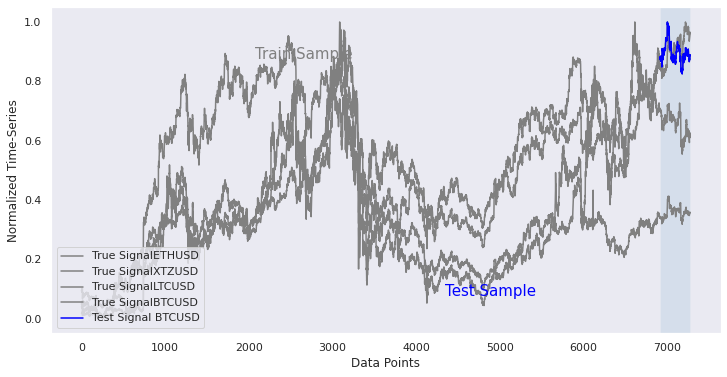

In [ ]:
train_fract = 0.95
data_size = train_data.shape[0]
train_size = int(data_size * train_fract)
test_size = data_size - train_size
 
plt.figure(figsize=(12,6))
plt.grid()
 
print(np.arange(train_size+test_size)) 


for cn in sdf.columns:
    print("cn=",cn)
    plt.plot(np.arange(train_size+test_size), sdf[cn], color = 'grey', \
            label='True Signal' + cn)



plt.plot(np.arange(train_size, train_size+test_size), sdf['BTCUSD'].iloc[train_size:], \
            color='blue', label='Test Signal '+'BTCUSD')
 


plt.axvspan(train_size, test_size+train_size, facecolor=blue, alpha=0.1)
plt.annotate("Train Sample", xy=(2075, 0.875), fontsize=15, color='grey')
plt.annotate("Test Sample", xy=(4350, 0.075), fontsize=15, color='blue')
plt.xlabel("Data Points")
plt.ylabel("Normalized Time-Series")
plt.legend(loc=3)

In [ ]:

#print(features.head(10))
#print(label.head(10))
train_X,test_X,train_Y,test_Y = train_test_split(features, label,test_size=0.05,random_state=42)
print("null:")
print(train_X.isnull().sum())
print("0:")
print((train_X==0).astype(int).any())
print("null:")
print(train_Y.isnull().sum())
print("0:")
print((train_Y==0).astype(int).any())
train_X = train_X.values.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.values.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X[0])
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

null:
BTCUSD-2    0
ETHUSD-2    0
XTZUSD-2    0
LTCUSD-2    0
BTCUSD-1    0
ETHUSD-1    0
XZTUSD-1    0
LTCUSD-1    0
dtype: int64
0:
BTCUSD-2    False
ETHUSD-2    False
XTZUSD-2    False
LTCUSD-2    False
BTCUSD-1    False
ETHUSD-1    False
XZTUSD-1    False
LTCUSD-1    False
dtype: bool
null:
BTCUSD-0    0
dtype: int64
0:
BTCUSD-0    False
dtype: bool
[[1.941429e+04 6.137600e+02 2.419400e+00 8.843000e+01 1.937146e+04
  6.141200e+02 2.419000e+00 8.844000e+01]]
(6915, 1, 8) (6915, 1) (364, 1, 8) (364, 1)


In [ ]:
data_set = data.astype('float32')
mms = MinMaxScaler(feature_range=(0, 1))
data_set = mms.fit_transform(data_set)



In [ ]:
ratio = 0.95
train_Size = int(len(data_set) * ratio)
test_Size = len(data_set) - train_Size
train, test = data_set[0:train_Size], data_set[train_Size:len(data_set)]


In [ ]:

print(train.shape)
train_x = train[:, :8]
train_y = train[:,[8]]

test_x = test[:,:8]
test_y = test[:,[8]]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

# train_x, train_y = create_dataset(train)
# test_x, test_y = create_dataset(test)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
print(train_y)

(6915, 9)
(6915, 1, 8) (6915, 1) (364, 1, 8) (364, 1)
[[0.03466719]
 [0.03729618]
 [0.03434277]
 ...
 [0.87394106]
 [0.8764837 ]
 [0.87811327]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
# # model.add(Dropout(0.2))
# # model.add(Activation('softmax'))
adamopt = Adam(lr = 0.00005)
model.compile(loss='mse', optimizer=adamopt)
#model.summary()
history = model.fit(train_x, train_y, epochs=80, batch_size=64, verbose=1, shuffle=False)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
109/109 [==============================] - 2s 3ms/step - loss: 0.3219
Epoch 2/80
109/109 [==============================] - 0s 3ms/step - loss: 0.2686
Epoch 3/80
109/109 [==============================] - 0s 3ms/step - loss: 0.2207
Epoch 4/80
109/109 [==============================] - 0s 3ms/step - loss: 0.1787
Epoch 5/80
109/109 [==============================] - 0s 3ms/step - loss: 0.1414
Epoch 6/80
109/109 [==============================] - 0s 3ms/step - loss: 0.1095
Epoch 7/80
109/109 [==============================] - 0s 3ms/step - loss: 0.0831
Epoch 8/80
109/109 [==============================] - 0s 3ms/step - loss: 0.0615
Epoch 9/80
109/109 [==============================] - 0s 3ms/step - loss: 0.0459
Epoch 10/80
109/109 [==============================] - 0s 3ms/step - loss: 0.0340
Epoch 11/80
109/109 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 12/80
109/109 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 13/80
109/109 [====

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation
# from tensorflow.keras.optimizers import Adam


# # model = Sequential()
# # model.add(LSTM(units = 50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Dropout(0.2))
# # model.add(Activation('softmax'))
# # model.add(LSTM(units =50, return_sequences = True))
# # model.add(Dropout(0.2))
# # model.add(LSTM(units = 50))
# # model.add(Dropout(0.2))


# tf.random.set_seed(7)
 
# dropout_fraction = 0.1
# units = 8*5
# ishape = train_X.shape[1], train_X.shape[2]
 
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.LSTM(units, return_sequences=True, input_shape=ishape))
# model.add(tf.keras.layers.Dropout(dropout_fraction))
# model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1)))
# #model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.ReLU(1)))
# adamopt = Adam(lr = 0.0001)
# model.compile(loss='mse', optimizer=adamopt)
 
# print(model.summary())

In [ ]:
print(history.history["loss"])


[0.32187598943710327, 0.2686009407043457, 0.2207334041595459, 0.17874637246131897, 0.1414189487695694, 0.10949330776929855, 0.08309264481067657, 0.06149280443787575, 0.045853495597839355, 0.03400086611509323, 0.026430955156683922, 0.02138134278357029, 0.018648482859134674, 0.016723228618502617, 0.015808353200554848, 0.015156886540353298, 0.014742844738066196, 0.014624283649027348, 0.014418790116906166, 0.014059494249522686, 0.013860592618584633, 0.013890860602259636, 0.01370486244559288, 0.013410077430307865, 0.01310630701482296, 0.012822440825402737, 0.012722357176244259, 0.012459641322493553, 0.012338189408183098, 0.012330462224781513, 0.011875715106725693, 0.011808337643742561, 0.011405045166611671, 0.01127387210726738, 0.011080400086939335, 0.010902877897024155, 0.010731429792940617, 0.010435238480567932, 0.010309097357094288, 0.010087516158819199, 0.009806618094444275, 0.009590016677975655, 0.009524502791464329, 0.009197901003062725, 0.008970210328698158, 0.0088355066254735, 0.008

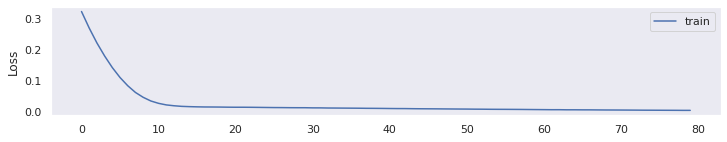

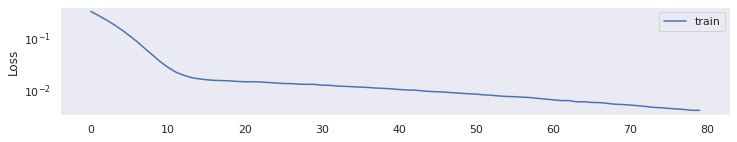

In [ ]:
plt.figure(figsize=(12,2))
plt.grid()
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.ylabel('Loss')
_ = plt.legend()
 
plt.figure(figsize=(12,2))
plt.grid()
plt.ylabel('Loss')
plt.semilogy(history.history['loss'], label='train')
#plt.semilogy(history.history['val_loss'], label='test')
_ = plt.legend()

In [ ]:
# 6
timesteps = 2


yhat = model.predict(test_x)
yorg = test_y
#print(test_y)
#print(yhat.shape)
#print(yorg.shape) 
yhat_f = yhat.flatten()
yorg_f = yorg.flatten()
# print("yhat")
# print(yhat_f)
# print("yorg")
# print(yorg)

# print(yhat_f.shape)
# print(yorg_f.shape)
# print(np.argwhere(np.isnan(yorg_f)))
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(yhat_f, yorg_f))
print('Test MSE: %.5f' % rmse)

Test MSE: 0.06682


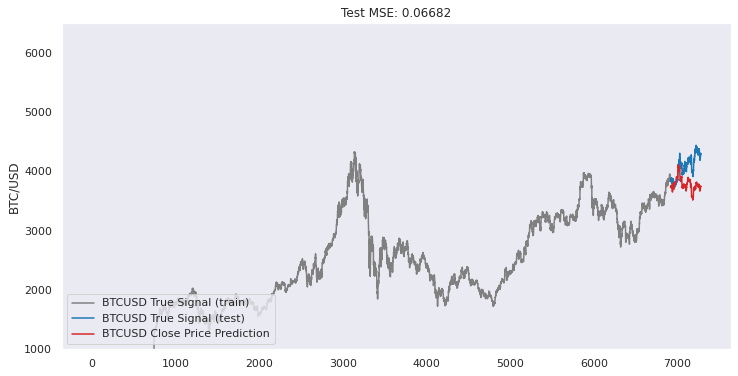

In [ ]:
z = np.zeros((test_size, 4))

z[:,0] = yhat_f

# print(sdf.head())
# print(close_prices.index[0:train_size])
yhat_inv = scaler.inverse_transform(z)[:,0]
yorg_inv = scaler.inverse_transform(sdf)[:,0]
# print(yhat_inv.shape)
# print(yorg_inv.shape)
# print(close_prices.index[train_size:])
# print(yhat_inv.shape)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(close_prices.index[0:train_size], yorg_inv[:train_size], '-', color='grey', \
         label='BTCUSD'+' True Signal (train)')
plt.plot(close_prices.index[train_size+2:], yorg_inv[train_size+2:], '-', color=blue, \
         label='BTCUSD'+' True Signal (test)')
plt.plot(close_prices.index[train_size:], yhat_inv, '-', color=red, label='BTCUSD'+ \
         ' Close Price Prediction')
 
plt.title('Test MSE: %.5f' % rmse)
plt.ylabel('BTC/USD', fontsize=12)
#plt.xlim([], df.index[-1]])
plt.ylim([1000,6500])
_ = plt.legend(loc=3)

Text(0.5, 1.0, 'Residuals')

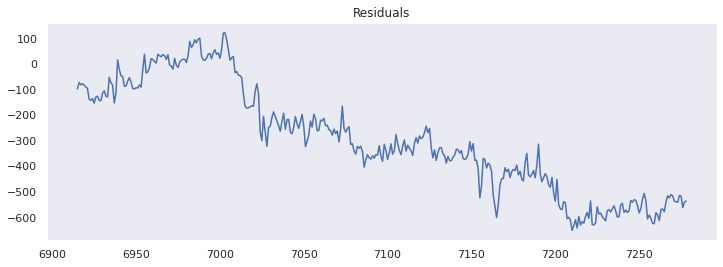

In [ ]:
btc = yorg_inv[train_size:]
btc_hat = yhat_inv
 
plt.figure(figsize=(12,4))
plt.grid()
res = btc_hat - btc
plt.plot(close_prices.index[train_size:], res)
plt.title('Residuals')


In [ ]:
############## 以上是新做的

In [ ]:
# 0 : - 
# 1 : +

sep_dropped['trend'] =  0

oct_dropped['trend'] =  0

for index, row in sep_dropped.iterrows():
  if row['Open'] < row['Close']:
    
    sep_dropped.at[index, 'trend'] = 1
 
for index, row in oct_dropped.iterrows():
  if row['Open'] < row['Close']:
    
    oct_dropped.at[index, 'trend'] = 1


In [ ]:
pd.set_option('display.max_columns', None)
#show all columns
pd.set_option('display.max_rows', None)
#show all rows
print(sep_dropped.columns)
print(sep_dropped.head(10))

print(oct_dropped.head(10))

In [ ]:
train_data=sep_dropped.iloc[:, 6:11].head(718)
test_data=oct_dropped["trend"].head(718)
print(train_data.head(10))
X_train, X_test, y_train, y_test = train_test_split(train_data, test_data,random_state=42)

In [ ]:
df=train_data
corr = df.corr() 
sns.heatmap(corr, cmap ='RdYlGn',annot = True,center=0) 


In [ ]:
def predict(X_train,X_test,y_train,y_test,clf_list):
  accuracy_dict={}
  for clf in clf_list:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy_dict[str(clf)]=accuracy_score(y_test,y_pred)
  return accuracy_dict


lr_clf = LogisticRegression()
nb_clf = GaussianNB()
rf_clf = RandomForestClassifier()
svm_clf = svm.SVC()
neigh_clf = KNeighborsClassifier(n_neighbors=3)

clf_list = [lr_clf, nb_clf, rf_clf, svm_clf,neigh_clf]

accuracy_dict=predict(X_train,X_test,y_train,y_test,clf_list)


In [ ]:
print(accuracy_dict)

plt.bar(accuracy_dict.keys(),accuracy_dict.values())
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Score")
plt.title("Cryptocurrency Trending Accuracy in Different Classifiers")
plt.xticks(rotation=270)
plt.show()